<a href="https://colab.research.google.com/github/juanma1986/Markovich/blob/main/markovich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install yfinance

In [48]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
import datetime as date 
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np



In [28]:
tickers = ["aapl","amzn","baba","bbd","bg","biox","dis","fb","fcx","glob","googl","jpm","ko","mcd","meli","mrk","msft","nvda","pbr","pfe","pg","rio","tm","tx","unh","v","wmt",]

In [49]:
stocks = yf.download(tickers)
itc = stocks.loc[:, "Close"].copy()

[*********************100%***********************]  27 of 27 completed


In [50]:
itc2 = itc.loc["2010-01-01":].dropna()

In [51]:
itc2

,AAPL,AMZN,BABA,BBD,BG,BIOX,DIS,FB,FCX,GLOB,...,NVDA,PBR,PFE,PG,RIO,TM,TX,UNH,V,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-22,42.212502,1544.920044,184.649994,9.533333,72.050003,9.60,100.599998,164.889999,18.049999,51.790001,...,60.462502,14.19,33.776093,76.410004,50.790001,127.019997,31.879999,215.210007,119.989998,87.139999
2018-03-23,41.235001,1495.560059,181.199997,9.633333,72.519997,9.64,98.540001,159.389999,17.520000,50.689999,...,58.242500,14.31,32.722961,75.910004,50.509998,124.500000,31.719999,212.550003,117.000000,85.419998
2018-03-26,43.192501,1555.859985,190.500000,9.675000,73.190002,9.64,100.650002,160.059998,17.750000,52.299999,...,61.119999,14.47,33.244781,76.410004,51.450001,127.309998,32.169998,219.070007,120.639999,87.500000
2018-03-27,42.084999,1497.050049,181.889999,9.483333,72.610001,9.60,99.360001,152.220001,17.240000,51.630001,...,56.380001,13.96,33.216320,77.790001,50.689999,128.039993,31.840000,217.960007,117.400002,86.050003
2018-03-28,41.619999,1431.420044,178.910004,9.566667,73.059998,9.60,98.540001,153.029999,16.750000,50.750000,...,55.337502,13.76,33.491463,78.839996,50.200001,129.369995,31.410000,218.500000,116.989998,87.769997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29,178.960007,3386.300049,116.709999,4.700000,108.080002,13.12,142.380005,229.860001,50.090000,275.399994,...,286.559998,14.49,52.740002,155.460007,78.379997,184.809998,46.230000,510.730011,228.119995,147.229996
2022-03-30,177.770004,3326.020020,116.580002,4.660000,109.709999,13.02,140.960007,227.850006,50.779999,247.839996,...,276.899994,14.67,52.439999,154.389999,80.500000,180.619995,45.939999,520.820007,223.949997,149.869995
2022-03-31,174.610001,3259.949951,108.800003,4.640000,110.809998,13.62,137.160004,222.360001,49.740002,262.070007,...,272.859985,14.80,51.770000,152.800003,80.400002,180.250000,45.650002,509.970001,221.770004,148.919998


Escala logaritmica

Pesos óptimos de la cartera:  [('aapl', 38.25), ('amzn', 0.0), ('baba', 0.0), ('bbd', 0.0), ('bg', 0.0), ('biox', 0.0), ('dis', 0.0), ('fb', 0.0), ('fcx', 0.0), ('glob', 12.04), ('googl', 0.0), ('jpm', 0.0), ('ko', 0.0), ('mcd', 0.0), ('meli', 0.0), ('mrk', 0.0), ('msft', 14.87), ('nvda', 0.0), ('pbr', 0.0), ('pfe', 0.0), ('pg', 31.830000000000002), ('rio', 0.0), ('tm', 0.0), ('tx', 0.0), ('unh', 0.0), ('v', 0.0), ('wmt', 3.01)]
Retorno óptimo de la cartera:  29.102
Volatilidad óptima de la cartera:  24.495
Ratio Sharpe óptimo de la cartera:  1.1881


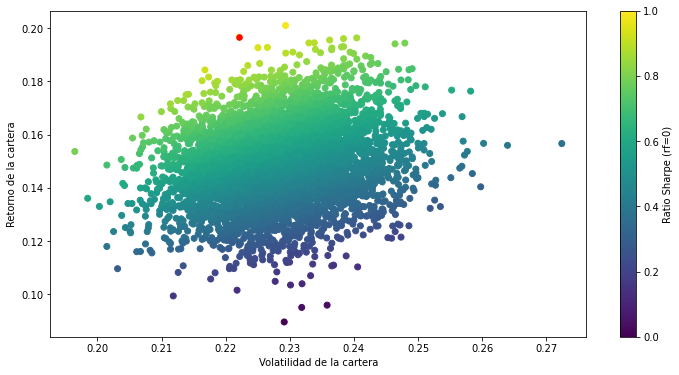

In [53]:
from pandas_datareader import data as wb
import scipy.optimize as optimize

log_returns = np.log(1+itc2.pct_change())

port_returns = []
port_vols = []

for i in range (5000):
    num_assets = len(tickers)
    weights = np.random.random(num_assets)
    weights /= np.sum(weights) 
    port_ret = np.sum(log_returns.mean() * weights) * 252
    port_var = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights)))       
    port_returns.append(port_ret)
    port_vols.append(port_var)

def portfolio_stats(weights, log_returns):
    port_ret = np.sum(log_returns.mean() * weights) * 252
    port_var = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
    sharpe = port_ret/port_var    
    return {'Return': port_ret, 'Volatility': port_var, 'Sharpe': sharpe}

def minimize_sharpe(weights, log_returns): 
    return -portfolio_stats(weights, log_returns)['Sharpe'] 

port_returns = np.array(port_returns)
port_vols = np.array(port_vols)
sharpe = port_returns/port_vols

max_sr_vol = port_vols[sharpe.argmax()]
max_sr_ret = port_returns[sharpe.argmax()]

constraints = ({'type' : 'eq', 'fun': lambda x: np.sum(x) -1})
bounds = tuple((0,1) for x in range(num_assets))
initializer = num_assets * [1./num_assets,]

optimal_sharpe = optimize.minimize(minimize_sharpe, initializer, method = 'SLSQP', args = (log_returns,) ,bounds = bounds, constraints = constraints)
optimal_sharpe_weights = optimal_sharpe['x'].round(4)
optimal_stats = portfolio_stats(optimal_sharpe_weights, log_returns)

print("Pesos óptimos de la cartera: ", list(zip(tickers, list(optimal_sharpe_weights*100))))
print("Retorno óptimo de la cartera: ", round(optimal_stats['Return']*100,4))
print("Volatilidad óptima de la cartera: ", round(optimal_stats['Volatility']*100,4))
print("Ratio Sharpe óptimo de la cartera: ", round(optimal_stats['Sharpe'],4))

plt.figure(figsize = (12,6))
plt.scatter(port_vols,port_returns,c = (port_returns/port_vols))
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=30)
plt.colorbar(label = 'Ratio Sharpe (rf=0)')
plt.xlabel('Volatilidad de la cartera')
plt.ylabel('Retorno de la cartera')
plt.show()

In [56]:
pesos_optimo1 = list(zip(tickers, list(optimal_sharpe_weights*100)))
pesos_optimo1

[('aapl', 38.25),
 ('amzn', 0.0),
 ('baba', 0.0),
 ('bbd', 0.0),
 ('bg', 0.0),
 ('biox', 0.0),
 ('dis', 0.0),
 ('fb', 0.0),
 ('fcx', 0.0),
 ('glob', 12.04),
 ('googl', 0.0),
 ('jpm', 0.0),
 ('ko', 0.0),
 ('mcd', 0.0),
 ('meli', 0.0),
 ('mrk', 0.0),
 ('msft', 14.87),
 ('nvda', 0.0),
 ('pbr', 0.0),
 ('pfe', 0.0),
 ('pg', 31.830000000000002),
 ('rio', 0.0),
 ('tm', 0.0),
 ('tx', 0.0),
 ('unh', 0.0),
 ('v', 0.0),
 ('wmt', 3.01)]

Escala simple

Pesos óptimos de la cartera:  [('aapl', 31.05), ('amzn', 0.0), ('baba', 0.0), ('bbd', 0.0), ('bg', 0.0), ('biox', 7.28), ('dis', 0.0), ('fb', 0.0), ('fcx', 2.83), ('glob', 14.89), ('googl', 0.0), ('jpm', 0.0), ('ko', 0.0), ('mcd', 0.0), ('meli', 2.9499999999999997), ('mrk', 0.0), ('msft', 3.2199999999999998), ('nvda', 2.39), ('pbr', 0.0), ('pfe', 0.0), ('pg', 27.79), ('rio', 0.0), ('tm', 0.0), ('tx', 0.0), ('unh', 2.78), ('v', 0.0), ('wmt', 4.81)]
Retorno óptimo de la cartera:  34.5445
Volatilidad óptima de la cartera:  24.0821
Ratio Sharpe óptimo de la cartera:  1.4344


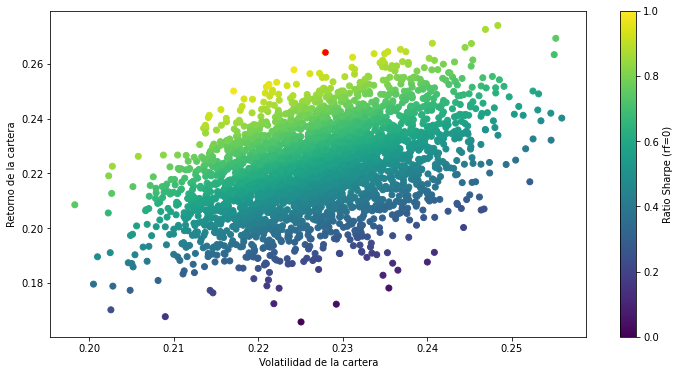

In [44]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import scipy.optimize as optimize

log_returns = itc2.pct_change()

port_returns = []
port_vols = []

for i in range (3000):
    num_assets = len(tickers)
    weights = np.random.random(num_assets)
    weights /= np.sum(weights) 
    port_ret = np.sum(log_returns.mean() * weights) * 252
    port_var = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights)))       
    port_returns.append(port_ret)
    port_vols.append(port_var)

def portfolio_stats(weights, log_returns):
    port_ret = np.sum(log_returns.mean() * weights) * 252
    port_var = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
    sharpe = port_ret/port_var    
    return {'Return': port_ret, 'Volatility': port_var, 'Sharpe': sharpe}

def minimize_sharpe(weights, log_returns): 
    return -portfolio_stats(weights, log_returns)['Sharpe'] 

port_returns = np.array(port_returns)
port_vols = np.array(port_vols)
sharpe = port_returns/port_vols

max_sr_vol = port_vols[sharpe.argmax()]
max_sr_ret = port_returns[sharpe.argmax()]

constraints = ({'type' : 'eq', 'fun': lambda x: np.sum(x) -1})
bounds = tuple((0,1) for x in range(num_assets))
initializer = num_assets * [1./num_assets,]

optimal_sharpe = optimize.minimize(minimize_sharpe, initializer, method = 'SLSQP', args = (log_returns,) ,bounds = bounds, constraints = constraints)
optimal_sharpe_weights = optimal_sharpe['x'].round(4)
optimal_stats = portfolio_stats(optimal_sharpe_weights, log_returns)

print("Pesos óptimos de la cartera: ", list(zip(tickers, list(optimal_sharpe_weights*100))))
print("Retorno óptimo de la cartera: ", round(optimal_stats['Return']*100,4))
print("Volatilidad óptima de la cartera: ", round(optimal_stats['Volatility']*100,4))
print("Ratio Sharpe óptimo de la cartera: ", round(optimal_stats['Sharpe'],4))

plt.figure(figsize = (12,6))
plt.scatter(port_vols,port_returns,c = (port_returns/port_vols))
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=30)
plt.colorbar(label = 'Ratio Sharpe (rf=0)')
plt.xlabel('Volatilidad de la cartera')
plt.ylabel('Retorno de la cartera')
plt.show()

In [46]:
Pesos_optimo = list(zip(tickers, list(optimal_sharpe_weights*100)))
Pesos_optimo

[('aapl', 31.05),
 ('amzn', 0.0),
 ('baba', 0.0),
 ('bbd', 0.0),
 ('bg', 0.0),
 ('biox', 7.28),
 ('dis', 0.0),
 ('fb', 0.0),
 ('fcx', 2.83),
 ('glob', 14.89),
 ('googl', 0.0),
 ('jpm', 0.0),
 ('ko', 0.0),
 ('mcd', 0.0),
 ('meli', 2.9499999999999997),
 ('mrk', 0.0),
 ('msft', 3.2199999999999998),
 ('nvda', 2.39),
 ('pbr', 0.0),
 ('pfe', 0.0),
 ('pg', 27.79),
 ('rio', 0.0),
 ('tm', 0.0),
 ('tx', 0.0),
 ('unh', 2.78),
 ('v', 0.0),
 ('wmt', 4.81)]

In [ ]:
---------------------------------------------